# King County Housing Price Prediction

## Project Overview
This project predicts house prices in King County using multiple machine learning models.
The workflow covers data preprocessing, feature selection, model building, and evaluation to identify the most effective predictive modeling approach.

### Dataset Features:
- **Target variable:** `price` (house sale price).
- **Key features:** `bedrooms`, `bathrooms`, `sqft_living`, `sqft_lot`, `floors`, 
  `waterfront`, `view`, `condition`, `grade`, `yr_built`, `zipcode`, `lat`, `long`, etc.
  
### Steps:
**1.** Import Libraries and Load Dataset  
**2.** Exploring the Data  
**3.** Understanding and Cleaning data  

### **4.** Exploratory Data Analysis (EDA)  
**4.1** Focus on High-Value Properties (≥ $650,000)  

### **5.** Machine learning models  
**5.1** KNN Regressor  
**5.2** Linear Regression  
**5.3** Random Forest Regressor  
**5.4** XGBoost Regressor  

### **6.** Improving Data  
**6.1** Improving Data 1  
**6.2** Improving Data 2  

### **7.** Improving XGBRegressor Model  


## 1. Import Libraries and Load Dataset

We begin by importing the required Python libraries


In [8]:
# Import the core libraries
import pandas as pd      # for data manipulation
import numpy as np       # for numerical computations
import matplotlib.pyplot as plt  # for plotting
import seaborn as sns    # for advanced visualizations
import xgboost as xgb # for XGBoost models
from sklearn import metrics # for model evaluation
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression # for models 
from sklearn.preprocessing import StandardScaler # for models 
from sklearn.model_selection import train_test_split # for models 
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score # for test models 
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV, KFold #for improving the model



# Make plots look a bit prettier
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10,6)


In [9]:
# Load the dataset
file_path = "king_ country_ houses_aa.csv"  # ensure this file is in your working directory
df = pd.read_csv(file_path)

## 2.Exploring the Data 

In [10]:
# 1. Shape of the dataset
print("Dataset shape (rows, columns):", df.shape)


Dataset shape (rows, columns): (21613, 21)


In [11]:
# 2. Column names and data types
print("\nData types:")
print(df.dtypes)


Data types:
id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


In [12]:
# 3. Preview the first 5 rows
print("\nFirst 5 rows of the dataset:")
display(df.head())


First 5 rows of the dataset:


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [13]:
# 4. Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


In [14]:
# 5. Check for duplicates (duplicate rows**)
duplicates = df.duplicated().sum()
print("\nNumber of duplicate rows:", duplicates)


Number of duplicate rows: 0


In [15]:
#looking for duplicated dates
#date: The date on which the house was sold (there are only 372 uniques dates)
df["date"].nunique()

372

In [16]:
#Dataset shape (rows, columns): (21.613, 21)
#id: A unique identifier for a house (there are only 21.436 uniques dates,we have 176 duplicated ID, what means we have more than one sale for the same house)
# this data has the historical information 

df["id"].nunique()

21436

In [17]:
# 6. Summary statistics (numerical columns)
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## 3. Understanding and Cleaning data

In [18]:
#date is in object format, we need to convert it to datetime
df["date"]

0        20141013T000000
1        20141209T000000
2        20150225T000000
3        20141209T000000
4        20150218T000000
              ...       
21608    20140521T000000
21609    20150223T000000
21610    20140623T000000
21611    20150116T000000
21612    20141015T000000
Name: date, Length: 21613, dtype: object

In [19]:
# Convert the 'date' in year and month 
df["date"] = pd.to_datetime(df["date"], format="%Y%m%dT%H%M%S", errors="coerce")

df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month

In [ ]:
#checking the conversion date, it worked
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


In [21]:

df.drop(columns=["date"], inplace=True)  # drop non-feature columns


In [22]:
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


## 4.Exploratory Data Analysis (EDA)

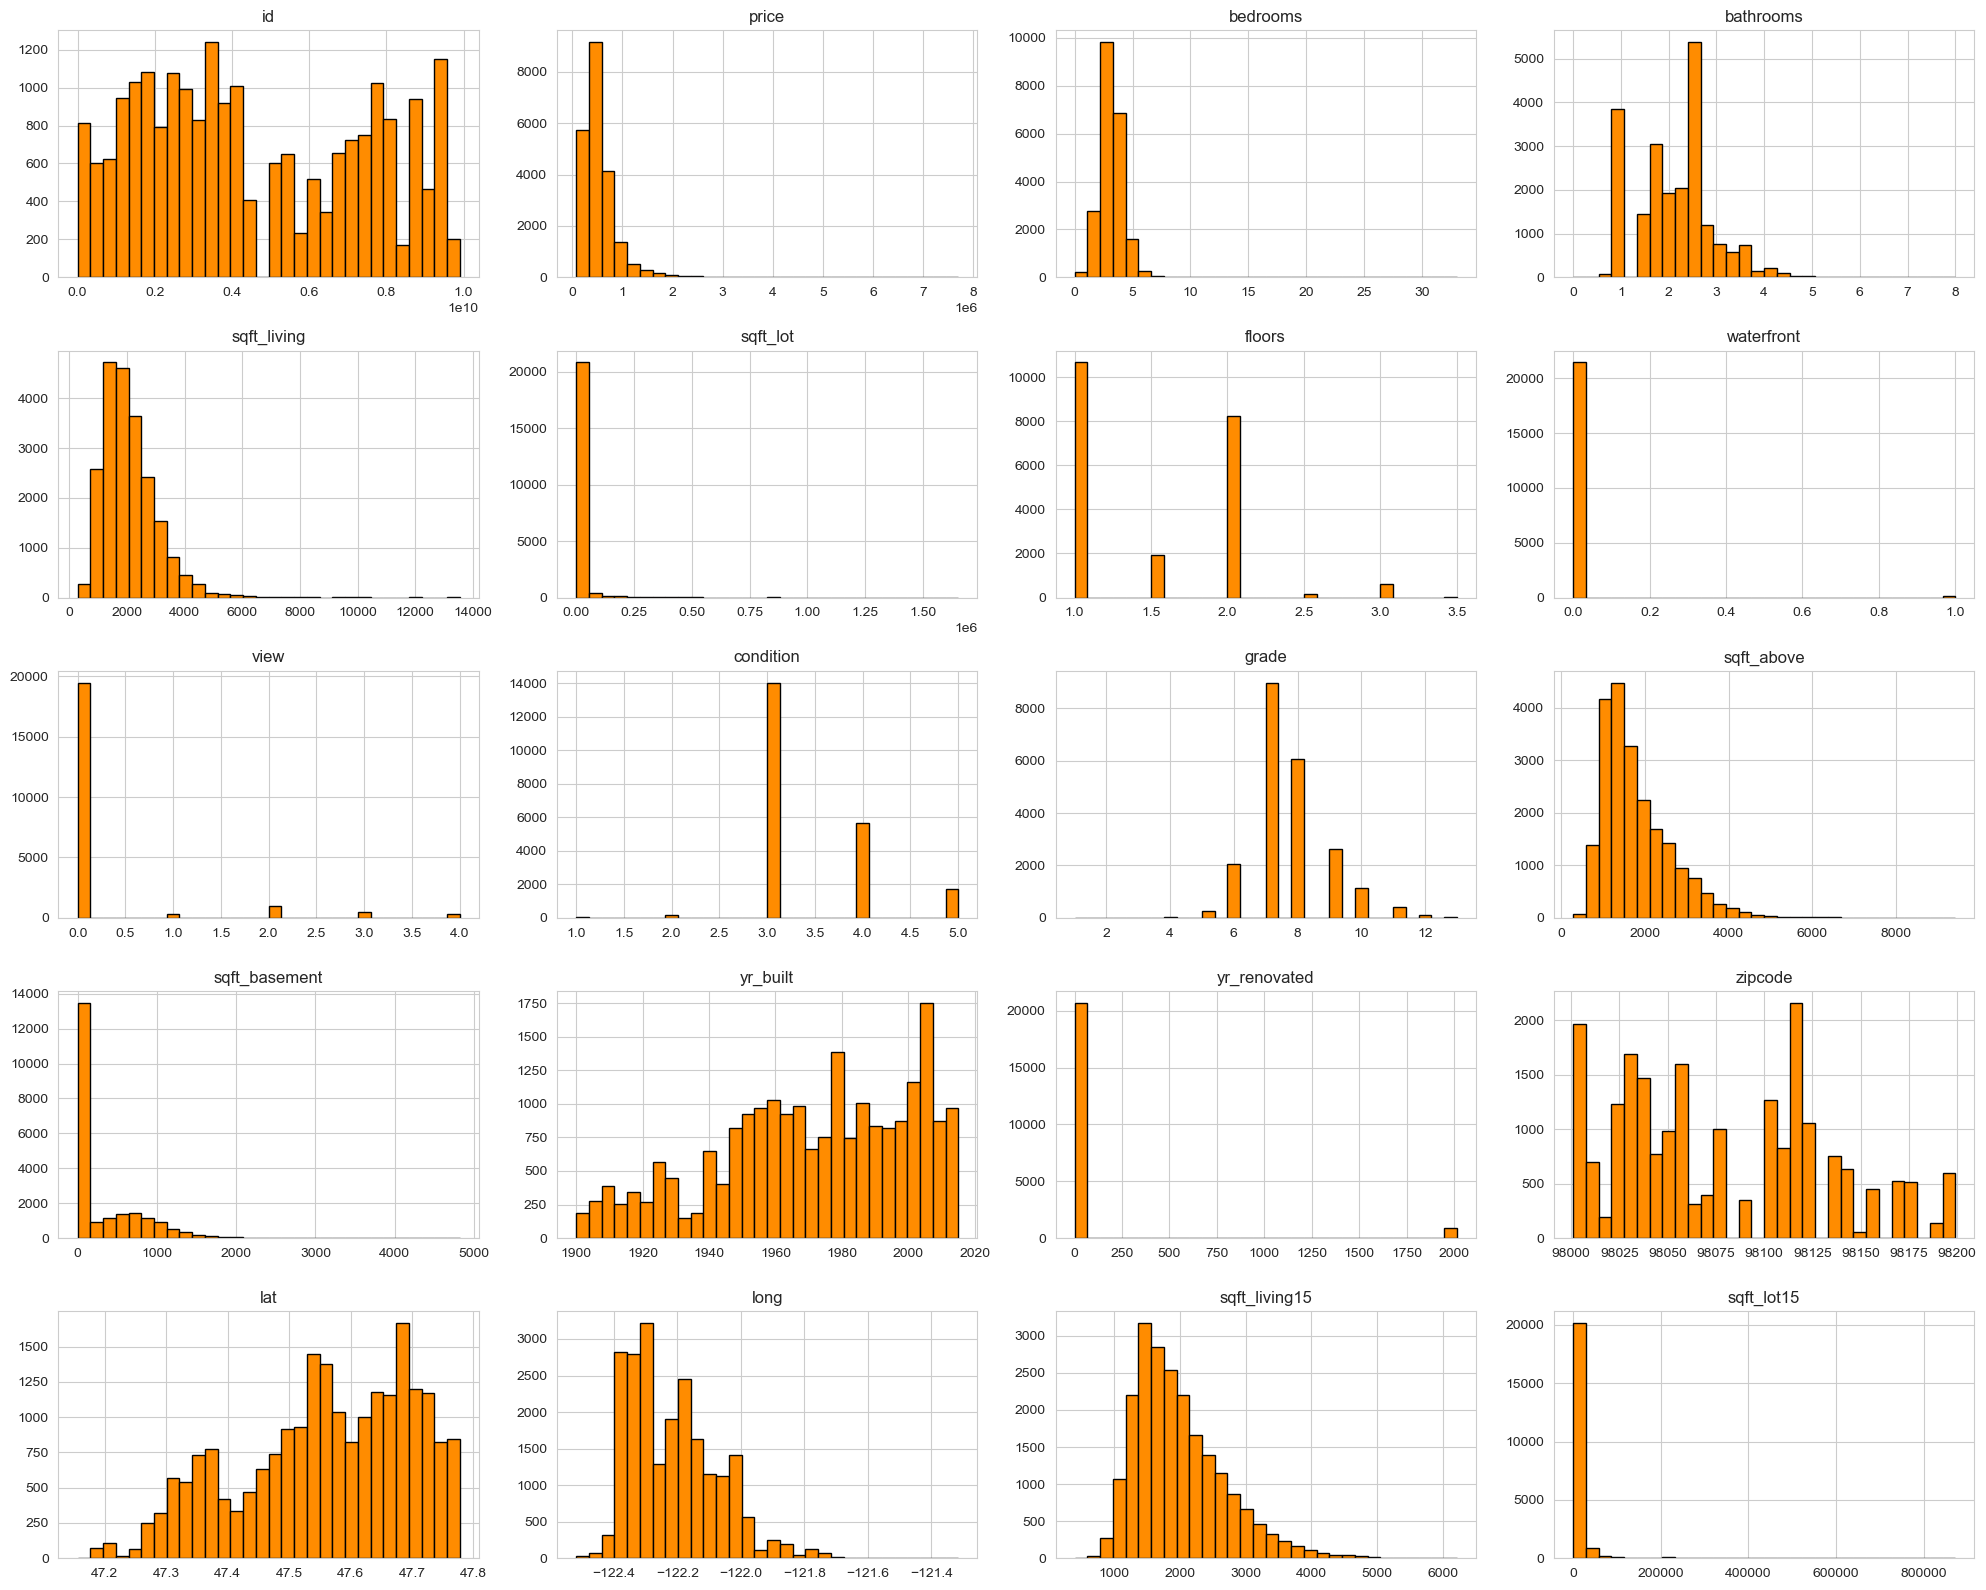

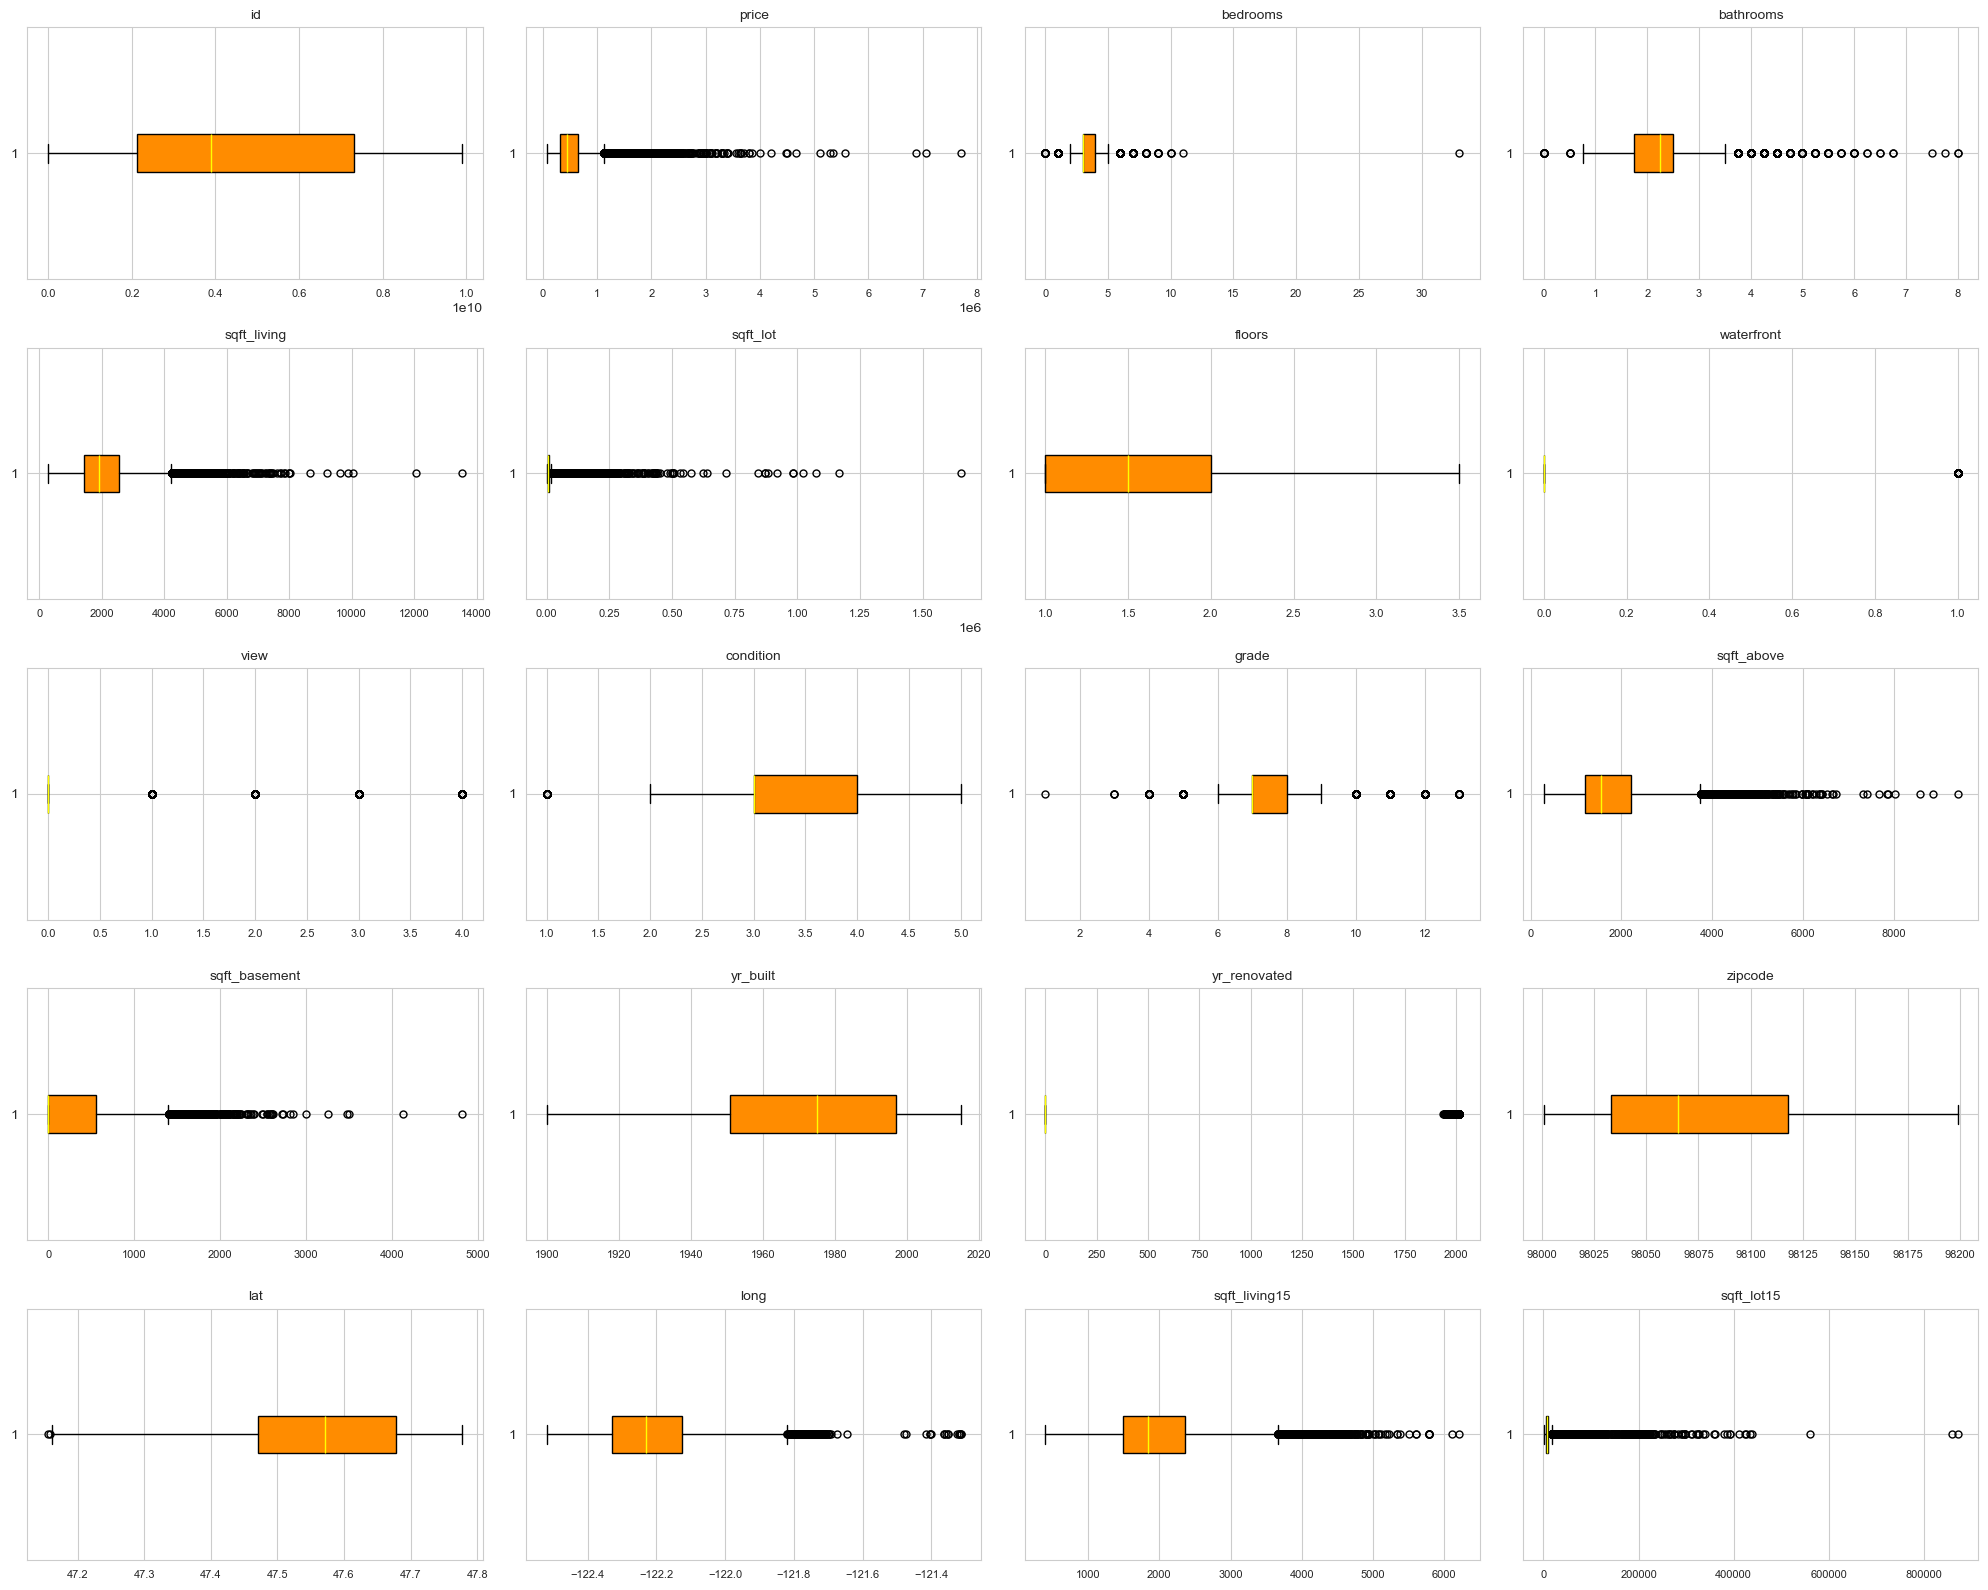

In [23]:
color = '#FF8C00'
# grid size
nrows, ncols = 5, 4  # adjust for your number of features
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))
axes = axes.flatten()

# Plot each numerical feature
for i, ax in enumerate(axes):
    if i >= len(df.columns):
        ax.set_visible(False)  # hide unesed plots
        continue
    ax.hist(df.iloc[:, i], bins=30, color=color, edgecolor='black')
    ax.set_title(df.columns[i])
plt.tight_layout()
plt.show()

nrows, ncols = 5, 4 
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))
axes = axes.flatten()
for i, ax in enumerate(axes):
    if i >= len(df.columns):
        ax.set_visible(False)
        continue
    ax.boxplot(df.iloc[:, i].dropna(), vert=False, patch_artist=True, 
               boxprops=dict(facecolor=color, color='black'), 
               medianprops=dict(color='yellow'), whiskerprops=dict(color='black'), 
               capprops=dict(color='black'), flierprops=dict(marker='o', color='red', markersize=5))
    ax.set_title(df.columns[i], fontsize=10)
    ax.tick_params(axis='x', labelsize=8)
plt.tight_layout()
plt.show()

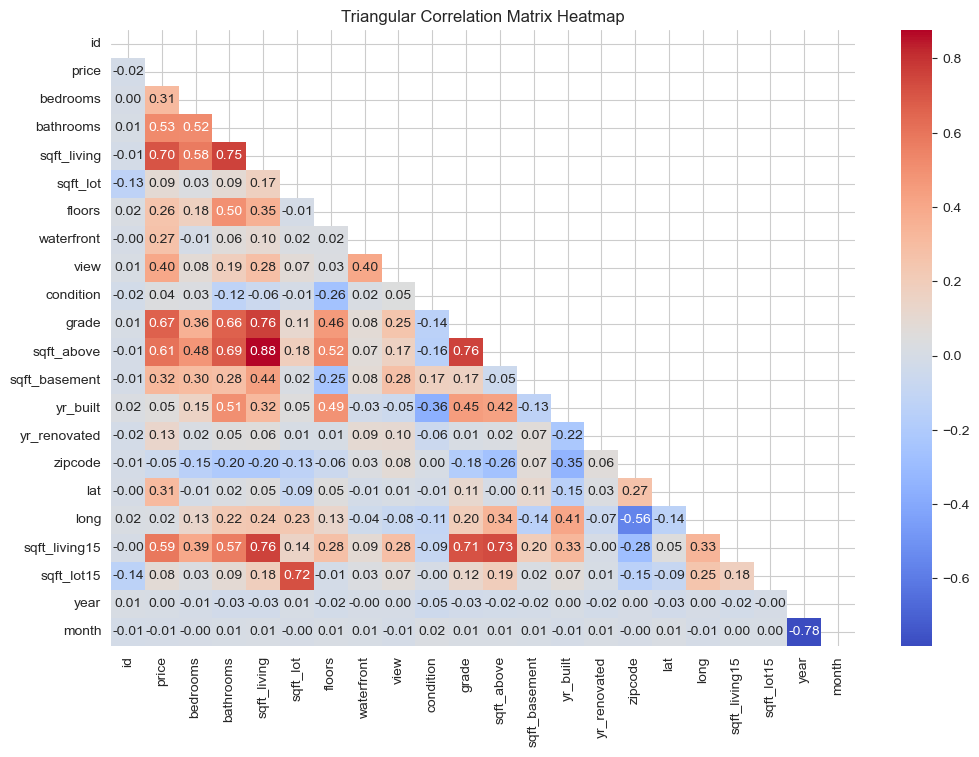

In [24]:
# Compute correlation matrix

corr_matrix = df.corr()

# Create mask for upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Plot heatmap (triangular form)
plt.figure(figsize=(12, 8))
sns.heatmap(
    corr_matrix,
    mask=mask,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar=True
)
plt.title("Triangular Correlation Matrix Heatmap")
plt.show()

The features that had the highest correlation with price were:
sqft_living,
grade,
sqft_above
sqft_living15


## 4.1 Focus on High-Value Properties (≥ $650,000)

Since premium houses are of special interest, let’s look specifically at the distribution of features among high-value homes.

In [25]:
df_expensive = df[df['price'] >= 650000]

In [26]:
df_expensive

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
5,7237550310,1225000.0,4,4.50,5420,101930,1.0,0,0,3,...,1530,2001,0,98053,47.6561,-122.005,4760,101930,2014,5
10,1736800520,662500.0,3,2.50,3560,9796,1.0,0,0,3,...,1700,1965,0,98007,47.6007,-122.145,2210,8925,2015,4
15,9297300055,650000.0,4,3.00,2950,5000,2.0,0,3,3,...,970,1979,0,98126,47.5714,-122.375,2140,4000,2015,1
21,2524049179,2000000.0,3,2.75,3050,44867,1.0,0,4,3,...,720,1968,0,98040,47.5316,-122.233,4110,20336,2014,8
26,1794500383,937000.0,3,1.75,2450,2691,2.0,0,0,3,...,700,1915,0,98119,47.6386,-122.360,1760,3573,2014,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21596,7502800100,679950.0,5,2.75,3600,9437,2.0,0,0,3,...,0,2014,0,98059,47.4822,-122.131,3550,9421,2014,8
21597,191100405,1575000.0,4,3.25,3410,10125,2.0,0,0,3,...,0,2007,0,98040,47.5653,-122.223,2290,10125,2015,4
21599,7202300110,810000.0,4,3.00,3990,7838,2.0,0,0,3,...,0,2003,0,98053,47.6857,-122.046,3370,6814,2014,9
21600,249000205,1537000.0,5,3.75,4470,8088,2.0,0,0,3,...,0,2008,0,98004,47.6321,-122.200,2780,8964,2014,10


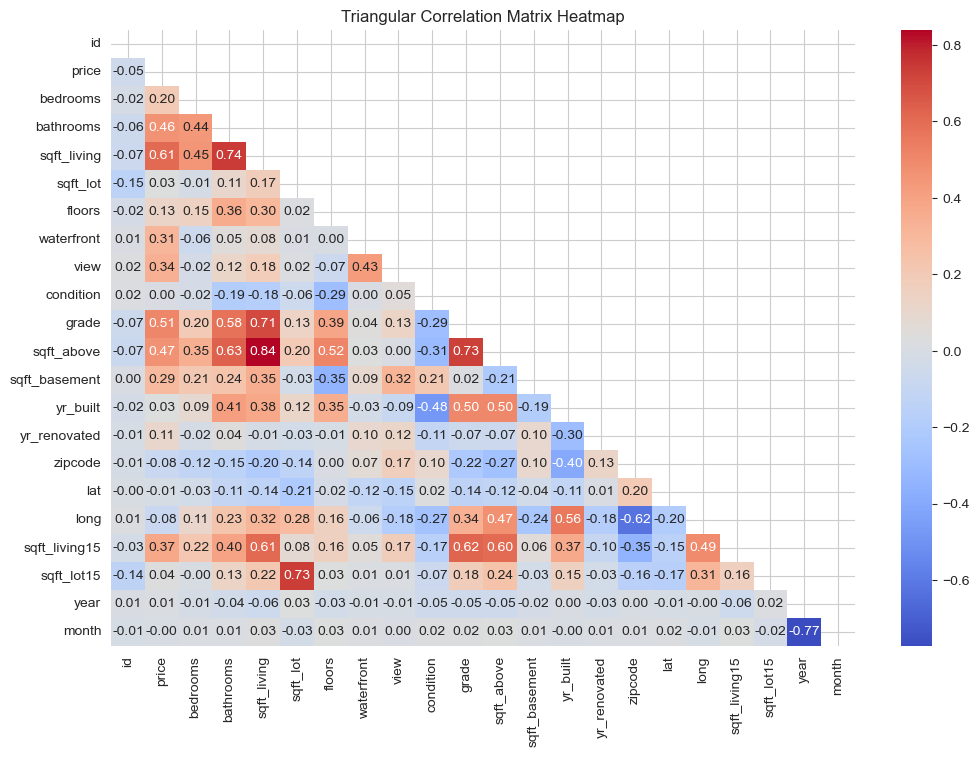

In [27]:
#expensive_houses 
corr_matrix1 = df_expensive.corr()

# Create mask for upper triangle
mask = np.triu(np.ones_like(corr_matrix1, dtype=bool))

# Plot heatmap (triangular form)
plt.figure(figsize=(12, 8))
sns.heatmap(
    corr_matrix1,
    mask=mask,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar=True
)
plt.title("Triangular Correlation Matrix Heatmap")
plt.show()

Among all features of the houses that are priced above 650k, sqft_living and grade show the **strongest positive correlations with price**. This suggests that they are major drivers of house value, which is why we will inspect them a bit further.



Number of houses priced ≥ $650,000: 5324


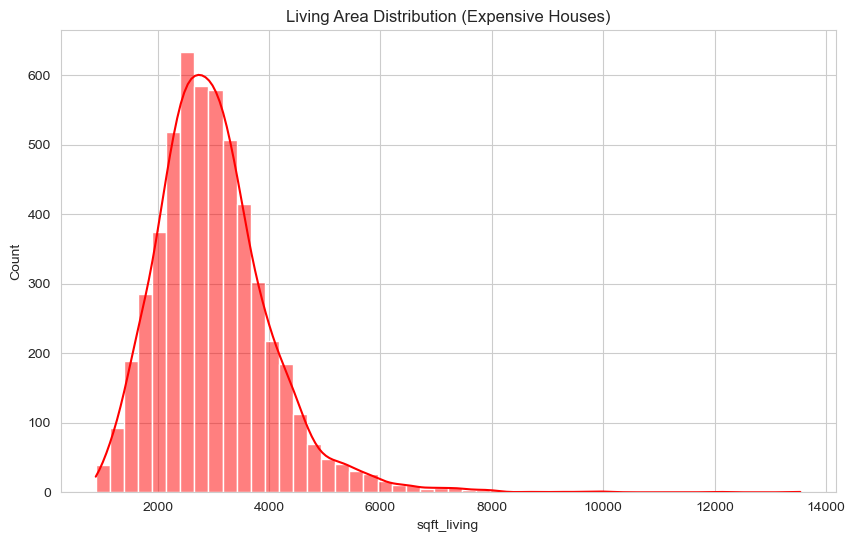

/var/folders/18/zrg33tnn2xj7wshyccyfkq300000gn/T/ipykernel_16994/469665800.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='grade', data=expensive_houses, palette="mako")


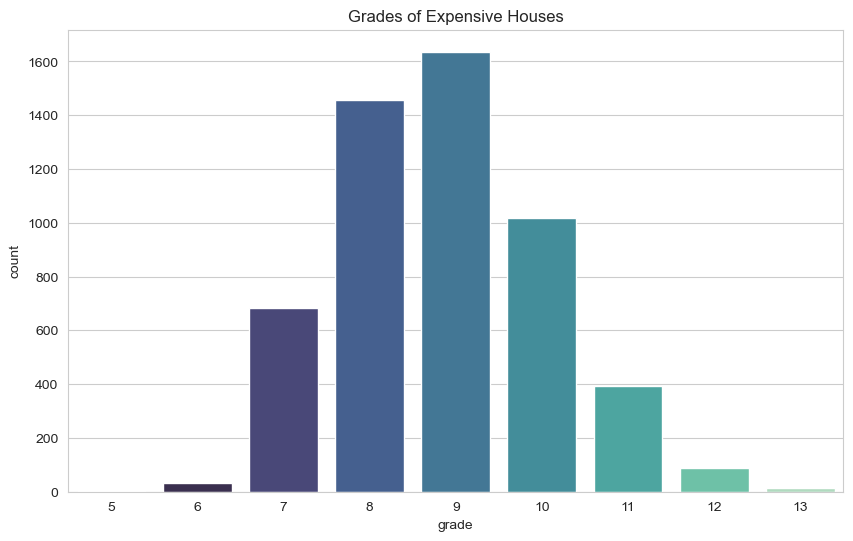

In [28]:
# Filter expensive houses
expensive_houses = df[df['price'] >= 650000]

print("Number of houses priced ≥ $650,000:", expensive_houses.shape[0])

# Compare distributions
sns.histplot(expensive_houses['sqft_living'], bins=50, kde=True, color="red")
plt.title("Living Area Distribution (Expensive Houses)")
plt.show()

sns.countplot(x='grade', data=expensive_houses, palette="mako")
plt.title("Grades of Expensive Houses")
plt.show()

### Conclusion 
As expected, larger homes (higher `sqft_living`) generally sell for higher prices.  
However, the relationship is **non-linear**:  
- Prices climb quickly up to ~4,000 ft², then gains taper off.  
- Above ~6,000 ft², homes are rare and highly variable in price — some very large homes are not proportionally more expensive, likely due to location, condition, or luxury features.  

This suggests that `sqft_living` is a strong but not sufficient predictor on its own; interactions with other features (like `grade` or `zipcode`) are important.

 
There is a clear **step-like increase in price with higher `grade`** (construction and finish quality):  

This indicates that `grade` captures a premium effect beyond square footage — especially important in the **luxury segment**, where craftsmanship and finishes heavily influence price.


## 5. Machine learning models

In [29]:
# Step 1: defnition of the target variable
#target variable: price
#features: all the other columns

X = df.drop(columns=["price"])  # drop the target variable and non-feature columns

y = df["price"]

In [30]:
# Step 2: Split the dataset into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## 5.1 KNNregressor

In [31]:
#Step 3 KNN: Create the KNN model 
knn = KNeighborsRegressor(n_neighbors = 15)

In [32]:
#Step 4 KNN: Fit the model to the training data
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=15)

In [33]:
# Step 5 KNN: Predictions
y_train_pred_knn = knn.predict(X_train)
y_test_pred_knn  = knn.predict(X_test)

In [34]:
# Step 6 KNN: Evaluations

# MSE
knn_mse_train = mean_squared_error(y_train, y_train_pred_knn)
knn_mse_test  = mean_squared_error(y_test, y_test_pred_knn)

# RMSE
knn_rmse_train = np.sqrt(knn_mse_train)
knn_rmse_test  = np.sqrt(knn_mse_test)

# R² Score
knn_r2_train = r2_score(y_train, y_train_pred_knn)
knn_r2_test  = r2_score(y_test, y_test_pred_knn)

# Result of the evaluations
print("KNN MSE Train:", knn_mse_train)
print("KNN MSE Test:", knn_mse_test)

print("KNN RMSE Train:", knn_rmse_train)
print("KNN RMSE Test:", knn_rmse_test)

print("KNN R² Score Train:", knn_r2_train)
print("KNN R² Score Test:", knn_r2_test)

KNN MSE Train: 90037364368.24388
KNN MSE Test: 89492468662.99998
KNN RMSE Train: 300062.267485007
KNN RMSE Test: 299152.9185266291
KNN R² Score Train: 0.35086126158757835
KNN R² Score Test: 0.24748355241294795


Knn model conclusion: The model is overfitting 

Our KNN predicts house prices with an average error of about 300k and explains only around a quarter of the price variability, showing limited predictive power.

## 5.2 Lineal Regression 

In [35]:
#Step 3 LR: Create the Linear Regression estimator
lr_housing_price_model = LinearRegression()

In [36]:
#Step 4 LR: Fit the model to the training data
lr_housing_price_model.fit(X_train, y_train)

LinearRegression()

In [37]:
# Step 5 LR: Predictions 
lr_y_test_pred = lr_housing_price_model.predict(X_test)
lr_y_train_pred = lr_housing_price_model.predict(X_train)

In [38]:
# Step 6 LR: Evaluations

# MSE
lr_mse_test = mean_squared_error(y_test, lr_y_test_pred)
lr_mse_train = mean_squared_error(y_train,lr_y_train_pred)

# RMSE 
lr_rmse_test = np.sqrt(lr_mse_test)
lr_rmse_train=np.sqrt(lr_mse_train)

# R² Score 
lr_r2_test = r2_score(y_test, lr_y_test_pred)
lr_r2_train = r2_score(y_train,lr_y_train_pred)

# Result of the evaluations
print("LR MSE Test", lr_mse_test)
print("LR MSE Train", lr_mse_train)

print("LR RMSE Test:", lr_mse_test)
print("LR RMSE Train:", lr_rmse_train)

print("LR R² Score Test:", lr_r2_test)
print("LR R² Score Train:", lr_r2_train)



LR MSE Test 36087179069.9278
LR MSE Train 41308321510.035255
LR RMSE Test: 36087179069.9278
LR RMSE Train: 203244.48703479083
LR R² Score Test: 0.6965532831661909
LR R² Score Train: 0.7021810678365819


Lineal Regression conclusion:
The linear regression model predicts house prices with an average error of 200–360k and explains around 70% of the variance, showing good fit on both training and test sets with minimal difference."

RMSE:
Train ≈ 203k → on average, predictions deviate about 203k from actual prices.
Test ≈ 360k → on new data, predictions deviate about 360k.

R²:
Train ≈ 0.70 → the model explains 70% of the price variability in the training set.
Test ≈ 0.70 → it explains about 69–70% of the variability on new data.


## 5.3 Random Forest Regressor

In [39]:
#Step 3 RF: Create the Random Forest Regressor model 
rf_housing_price_model = RandomForestRegressor(n_estimators=150, random_state=42)

In [40]:
#Step 4 RF: Fit the model to the training data
rf_housing_price_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=150, random_state=42)

In [41]:
# Step 5 RF: Predictions
rf_y_test_pred= rf_housing_price_model.predict(X_test)
rf_y_train_pred= rf_housing_price_model.predict(X_train)

In [42]:
# Step 6 RF: Evaluations

# MSE
rf_mse_test = mean_squared_error(y_test, rf_y_test_pred)
rf_mse_train =mean_squared_error(y_train, rf_y_train_pred)

# RMSE
rf_rmse_test  = np.sqrt(rf_mse_test)
rf_rmse_train = np.sqrt(rf_mse_train)

# R² Score 
rf_r2_test = r2_score(y_test, rf_y_test_pred)
rf_r2_train=r2_score(y_train,rf_y_train_pred)

# Result of the evaluations
print("RF MSE Test:", rf_mse_test)
print("RF MSE Train", rf_mse_train)

print("RF RMSE Test:", rf_rmse_test)
print("RF RMSE Train:", rf_rmse_train)

print("RF R² Score Test:", rf_r2_test)
print("RF R² Score Train:", rf_r2_test)

RF MSE Test: 12917073862.166603
RF MSE Train 2423041323.9638
RF RMSE Test: 113653.30554878993
RF RMSE Train: 49224.397649578204
RF R² Score Test: 0.8913840384426006
RF R² Score Train: 0.8913840384426006


Random Forest Regressor conclusion:
The Random Forest model predicts house prices with an average error of 49–114k and explains around 89% of the variance, showing excellent fit and strong generalization on both training and test sets.

RMSE:
Train ≈ 49k → on average, predictions deviate about 49k from actual prices in the training set.
Test ≈ 114k → on new data, predictions deviate about 114k.

R²:
Train ≈ 0.89 → the model explains 89% of the price variability in the training set.
Test ≈ 0.89 → it also explains about 89% of the variability on new data.


## 5.4 Xgboost regressor

In [43]:
#Step 3 XG: Create the XGBoost Regressor model 
xgb = XGBRegressor(random_state=42)

In [44]:
# Step 4 XG: Fit the model to the training data
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [45]:
# Step 5 XG: Predictions
xg_y_train_pred = xgb.predict(X_train)
xg_y_test_pred  = xgb.predict(X_test)

In [46]:
# Step 6 XG: Evaluations

# MSE
xg_mse_train = mean_squared_error(y_train, xg_y_train_pred)
xg_mse_test  = mean_squared_error(y_test, xg_y_test_pred)

# RMSE
xg_rmse_train = np.sqrt(xg_mse_train)
xg_rmse_test  = np.sqrt(xg_mse_test)

# R² Score
xg_r2_train = r2_score(y_train, xg_y_train_pred)
xg_r2_test  = r2_score(y_test, xg_y_test_pred)

# Result of the evaluations
print("XG MSE Train:", xg_mse_train)
print("XG MSE Test:", xg_mse_test)

print("XG RMSE Train:", xg_rmse_train)
print("XG RMSE Test:", xg_rmse_test)

print("XG R² Score Train:", xg_r2_train)
print("XG R² Score Test:", xg_r2_test)

XG MSE Train: 3010124624.6247144
XG MSE Test: 12273706300.97231
XG RMSE Train: 54864.60265621828
XG RMSE Test: 110786.76049498112
XG R² Score Train: 0.9782980264359868
XG R² Score Test: 0.8967939313517549


Xgboost regressor conclusion:
The XGBoost model predicts house prices with an average error of ~55–111k and explains roughly 90% of the variance, showing excellent fit and strong generalization on both training and test sets.

RMSE:
Train ≈ 54.9k → on average, predictions deviate about 54.9k from actual prices in the training set.
Test ≈ 110.8k → on new data, predictions deviate about 110.8k.

R²:
Train ≈ 0.978 → the model explains 97.8% of the price variability in training.
Test ≈ 0.897 → it explains about 89.7% of the variability on new data.


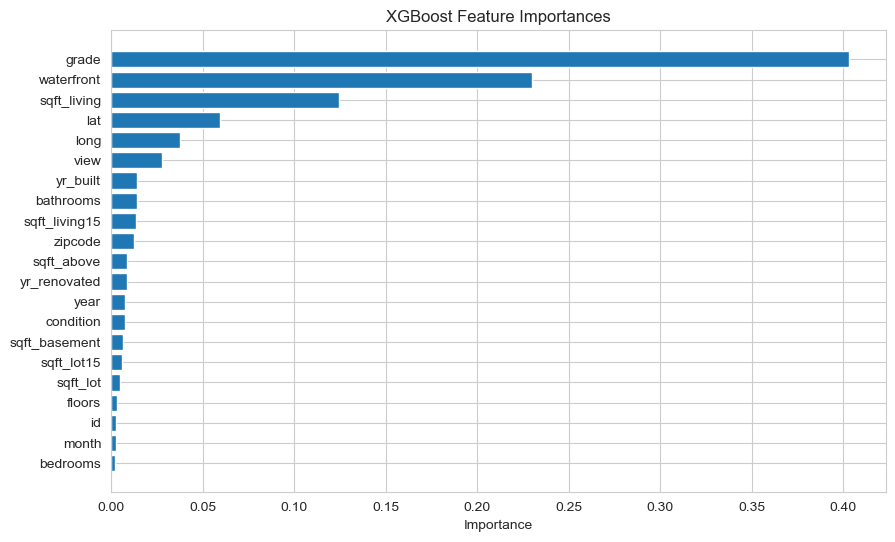

In [47]:
importances = xgb.feature_importances_
features = xgb.get_booster().feature_names
fi_df = pd.DataFrame({
    "feature": features,
    "importance": importances
})
fi_df = fi_df.sort_values("importance", ascending=False)
plt.figure(figsize=(10, 6))
plt.barh(fi_df["feature"], fi_df["importance"])
plt.gca().invert_yaxis()
plt.xlabel("Importance")
plt.title("XGBoost Feature Importances")
plt.show()

## 6. Improving Data 

## 6.1 Improving Data 1

To improve our dataset, we will eliminate features that have a low correlation with the target (price), i.e. less than 50% correlation.

In [48]:
df_imp1 = df.drop(columns=["id","bedrooms", "sqft_lot", "floors", "waterfront","view", "condition","sqft_basement","yr_built","yr_renovated","zipcode", "lat", "long", "sqft_lot15", "year", "month",])

In [49]:
df_imp1

,price,bathrooms,sqft_living,grade,sqft_above,sqft_living15
0,221900.0,1.00,1180,7,1180,1340
1,538000.0,2.25,2570,7,2170,1690
2,180000.0,1.00,770,6,770,2720
3,604000.0,3.00,1960,7,1050,1360
4,510000.0,2.00,1680,8,1680,1800
...,...,...,...,...,...,...
21608,360000.0,2.50,1530,8,1530,1530
21609,400000.0,2.50,2310,8,2310,1830
21610,402101.0,0.75,1020,7,1020,1020
21611,400000.0,2.50,1600,8,1600,1410


In [50]:
# Step 1: defnition of the target variable with dataset improved
X_imp1 = df_imp1.drop(columns=["price"])  # drop the target variable and non-feature columns

y_imp1 = df_imp1["price"]

In [51]:
# Step 2: Split the dataset into training and testing sets with dataset improved
X_train_imp1, X_test_imp1, y_train_imp1, y_test_imp1 = train_test_split(X_imp1, y_imp1, test_size=0.2, random_state=0)

In [52]:
#Step 3 XG: Create the XGBoost Regressor model with dataset improved
xgb_imp1 = XGBRegressor(random_state=42)

In [53]:
# Step 4 XG: Fit the model to the training data with dataset improved
xgb_imp1.fit(X_train_imp1, y_train_imp1)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [54]:
# Step 5 XG: Predictions with dataset improved
xg_imp1_y_train_pred = xgb_imp1.predict(X_train_imp1) 
xg_imp1_y_test_pred  = xgb_imp1.predict(X_test_imp1)

In [55]:
# Step 6 XG: Evaluations with dataset improved 

# MSE
xg_imp1_mse_train = mean_squared_error(y_train_imp1, xg_imp1_y_train_pred) 
xg_imp1_mse_test  = mean_squared_error(y_test_imp1, xg_imp1_y_test_pred)

# RMSE
xg_imp1_rmse_train = np.sqrt(xg_imp1_mse_train)
xg_imp1_rmse_test  = np.sqrt(xg_imp1_mse_test)

# R² Score
xg_imp1_r2_train = r2_score(y_train_imp1, xg_imp1_y_train_pred)
xg_imp1_r2_test  = r2_score(y_test_imp1, xg_imp1_y_test_pred)

# Result of the evaluations
print("XG_imp1 MSE Train:", xg_imp1_mse_train)
print("XG_imp1 MSE Test:", xg_imp1_mse_test)

print("XG_imp1 RMSE Train:", xg_imp1_rmse_train)
print("XG_imp1 RMSE Test:", xg_imp1_rmse_test)

print("XG_imp1 R² Score Train:", xg_imp1_r2_train)
print("XG_imp1 R² Score Test:", xg_imp1_r2_test)

XG_imp1 MSE Train: 24147094374.13926
XG_imp1 MSE Test: 53430651495.04678
XG_imp1 RMSE Train: 155393.35370001916
XG_imp1 RMSE Test: 231150.71164728605
XG_imp1 R² Score Train: 0.8259076719055657
XG_imp1 R² Score Test: 0.5507170083024215


First result: 
XG MSE Train: 3010124624.6247144
XG MSE Test: 12273706300.97231
XG RMSE Train: 54864.60265621828
XG RMSE Test: 110786.76049498112
XG R² Score Train: 0.9782980264359868 (this increase)
XG R² Score Test: 0.8967939313517549 (this decrease)

| Metric     | Before Feature Drop (XGBoost) | After Feature Drop (XG\_imp1) |
| ---------- | ----------------------------- | ----------------------------- |
| RMSE Train | 54,865                        | 155,393                       |
| RMSE Test  | 110,787                       | 231,151                       |
| R² Train   | 0.978                         | 0.826                         |
| R² Test    | 0.897                         | 0.551                         |


IMPROVING DATA 1, conclusion:
Dropping columns with correlation below 50% hurts model performance. Even features with low correlation can contain complementary information that helps XGBoost predict house prices more accurately. After removing them, errors increased and R² dropped significantly, especially on the test set.

## 6.2 Improving Data 2

To improve our data set, we will eliminate the features that have low importance in the Xgboost regressor model according to what is observed in the XGBoost Feature Importances graph in point 3.4 Xgboost regressor.

In [56]:
#Note: in the first improving we removed lat, but in this second improving this is important.
#in this second improving we removed sqft_above, sqft_living15, bathrooms, there have more than 50% the correlation and we did not deleted them in the first imporving. 
df_imp2 = df.drop(columns=["bedrooms", "month", "id","floors", "sqft_lot15", "sqft_lot", "sqft_basement", "condition", "year","yr_renovated", "sqft_above", "zipcode", "sqft_living15", "bathrooms","yr_built", "view","long"])

In [57]:
df_imp2

,price,sqft_living,waterfront,grade,lat
0,221900.0,1180,0,7,47.5112
1,538000.0,2570,0,7,47.7210
2,180000.0,770,0,6,47.7379
3,604000.0,1960,0,7,47.5208
4,510000.0,1680,0,8,47.6168
...,...,...,...,...,...
21608,360000.0,1530,0,8,47.6993
21609,400000.0,2310,0,8,47.5107
21610,402101.0,1020,0,7,47.5944
21611,400000.0,1600,0,8,47.5345


In [58]:
# Step 1: defnition of the target variable with dataset improved 2
X_imp2 = df_imp2.drop(columns=["price"])  # drop the target variable and non-feature columns

y_imp2 = df_imp2["price"]

In [59]:
# Step 2: Split the dataset into training and testing sets with dataset improved 2
X_train_imp2, X_test_imp2, y_train_imp2, y_test_imp2 = train_test_split(X_imp2, y_imp2, test_size=0.2, random_state=0)

In [60]:
#Step 3 XG: Create the XGBoost Regressor model with dataset improved 2
xgb_imp2 = XGBRegressor(random_state=42)

In [61]:
# Step 4 XG: Fit the model to the training data with dataset improved 2
xgb_imp2.fit(X_train_imp2, y_train_imp2)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [62]:
# Step 5 XG: Predictions with dataset improved 2
xg_imp2_y_train_pred = xgb_imp2.predict(X_train_imp2) 
xg_imp2_y_test_pred  = xgb_imp2.predict(X_test_imp2)

In [63]:
# Step 6 XG: Evaluations with dataset improved 2

# MSE
xg_imp2_mse_train = mean_squared_error(y_train_imp2, xg_imp2_y_train_pred) 
xg_imp2_mse_test  = mean_squared_error(y_test_imp2, xg_imp2_y_test_pred)

# RMSE
xg_imp2_rmse_train = np.sqrt(xg_imp2_mse_train)
xg_imp2_rmse_test  = np.sqrt(xg_imp2_mse_test)

# R² Score
xg_imp2_r2_train = r2_score(y_train_imp2, xg_imp2_y_train_pred)
xg_imp2_r2_test  = r2_score(y_test_imp2, xg_imp2_y_test_pred)

# Result of the evaluations
print("XG_imp2 MSE Train:", xg_imp2_mse_train)
print("XG_imp2 MSE Test:", xg_imp2_mse_test)

print("XG_imp2 RMSE Train:", xg_imp2_rmse_train)
print("XG_imp2 RMSE Test:", xg_imp2_rmse_test)

print("XG_imp2 R² Score Train:", xg_imp2_r2_train)
print("XG_imp2 R² Score Test:", xg_imp2_r2_test)

XG_imp2 MSE Train: 13791520254.235588
XG_imp2 MSE Test: 28305417605.837315
XG_imp2 RMSE Train: 117437.30350376574
XG_imp2 RMSE Test: 168242.13980402565
XG_imp2 R² Score Train: 0.900567835126664
XG_imp2 R² Score Test: 0.7619878787295188


In [64]:
# Compact comparison table
import pandas as pd

data = {
    "Model": ["Original XG", "XG_imp1", "XG_imp2"],
    "RMSE Test": [110787, 231151, 168242],
    "R² Test": [0.897, 0.552, 0.762]
}

df_summary = pd.DataFrame(data)
df_summary


,Model,RMSE Test,R² Test
0,Original XG,110787,0.897
1,XG_imp1,231151,0.552
2,XG_imp2,168242,0.762


Conclusion:
The first improvement (XG_imp1) hurt the model because removing low-correlation features eliminated complementary information.
The second improvement (XG_imp2) recovered much of the lost performance by keeping important features like sqft_above, sqft_living15, bathrooms, and lat, which improved both RMSE and R² on train and test sets.
Overall, XG_imp2 achieves a good balance: lower complexity than the original model, but still strong predictive performance (R² Test ~0.76, RMSE Test ~168k).

## 7. Improving XGBRegressor Model

In [ ]:

xgb = XGBRegressor(
    objective="reg:squarederror",
    tree_method="hist",
    n_jobs=-1,
    random_state=42,
    eval_metric="rmse"
)
param_dist = {
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.05, 0.1],
    "subsample": [0.7, 0.9, 1.0],
    "colsample_bytree": [0.7, 0.9, 1.0],
    "n_estimators": [300, 600, 900]
}
search = RandomizedSearchCV(
    xgb, param_dist,
    n_iter=20,             # small for speed
    cv=3,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1, verbose=1,
    random_state=42
)
# Fit search
search.fit(X_train, y_train)
print("Best params:", search.best_params_)

# Evaluate on test set
best_model = search.best_estimator_
y_pred = best_model.predict(X_test)
y_train_pred= best_model.predict(X_train)
print("Test RMSE:", mean_squared_error(y_test, y_pred))
print("Test R²:", r2_score(y_test, y_pred))
print("Train R2:", r2_score(y_train, y_train_pred))

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best params: {'subsample': 0.7, 'n_estimators': 900, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 0.9}
Test RMSE: 10898820993.410042
Test R²: 0.9083549467415801
Train R2: 0.9874414958957967


Exception ignored in: <function ResourceTracker.__del__ at 0x1045d5d00>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x10b0d5d00>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/opt/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x106fd5d00>
Traceback (most recent call last

| Model         | Test RMSE   | Test R²   |
| ------------- | ----------- | --------- |
| Original XG   | 110,787     | 0.897     |
| XG_imp1       | 231,151     | 0.552     |
| XG_imp2       | 168,242     | 0.762     |
| **XG_tuned**  | **108,988** | **0.908** |


Improving XGBRegressor Model Conclusion:
The tuned XGBoost model (XG_tuned) is the best performing model so far.
It has higher R² and lower RMSE than all previous versions, showing that hyperparameter tuning effectively improved predictive performance.
Compared to XG_imp2 (best previous improvement), RMSE decreased (~168k → ~109k) and R² increased (~0.762 → ~0.908), meaning that model now predicts prices more accurately.